In [2]:
## This is a demo project to find statistical pattern of raw data

In [1]:
import numpy as np
import pandas as pd
# Visualization Libraries
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import seaborn as sns
from sklearn import datasets # for using built-in datasets
from sklearn import metrics # for checking the model accuracy
#To plot the graph embedded in the notebook
%matplotlib inline

In [4]:
evaluation_df=pd.read_excel('evaluation_dataset.xlsx')
evaluation_df
#please install openpyxl in pip before loading the excel file

,BCT Name,TS,TV,TA,FA,RE,SE,CA,MC,EE,PE,BI,JR,Ex,Im,SI,PV,PU,SC,TL (%)
0,Bitcoin,5.263158,5.263158,5.263158,4.736842,5.894737,6.555556,6.225146,3.774854,6.352941,6.631579,5.225455,,4.000000,5.846154,5.397727,5.846154,5.503322,8,47.381530
1,Etherium,4.000000,4.000000,4.000000,6.000000,8.000000,6.000000,7.000000,3.000000,8.000000,7.000000,5.333333,,8.000000,8.000000,7.000000,8.000000,8.000000,8,56.666667
2,Solana,4.000000,4.000000,4.000000,6.000000,7.000000,7.000000,7.000000,3.000000,2.000000,7.550000,7.516667,,4.000000,8.000000,7.000000,8.000000,7.000000,2,71.033333
3,Dogecoin,7.600000,7.800000,7.800000,2.200000,2.000000,2.000000,2.000000,8.000000,7.333333,6.666667,5.555556,,7.333333,6.000000,7.333333,4.000000,6.000000,3,45.511111
4,Axie Infinity,7.714000,7.714000,7.714000,2.286000,6.000000,6.000000,6.000000,4.000000,6.000000,6.000000,6.000000,,8.000000,9.000000,8.000000,8.000000,6.000000,7,46.572000
5,Social NFT MarketPlace,4.500000,4.500000,4.500000,5.500000,9.000000,8.000000,9.500000,0.500000,6.000000,8.000000,4.666667,,0.000000,10.000000,2.000000,8.000000,6.000000,4,63.333333


In [5]:
evaluation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 20 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   BCT Name  6 non-null      object 
 1   TS        6 non-null      float64
 2   TV        6 non-null      float64
 3   TA        6 non-null      float64
 4   FA        6 non-null      float64
 5   RE        6 non-null      float64
 6   SE        6 non-null      float64
 7   CA        6 non-null      float64
 8   MC        6 non-null      float64
 9   EE        6 non-null      float64
 10  PE        6 non-null      float64
 11  BI        6 non-null      float64
 12  JR        6 non-null      object 
 13  Ex        6 non-null      float64
 14  Im        6 non-null      float64
 15  SI        6 non-null      float64
 16  PV        6 non-null      float64
 17  PU        6 non-null      float64
 18  SC        6 non-null      int64  
 19  TL (%)    6 non-null      float64
dtypes: float64(17), int64(1), object(2)


In [6]:
#Preprocessing
evaluation_df.isnull().mean()
print(evaluation_df)
evaluation_df

                 BCT Name        TS        TV        TA        FA        RE  \
0                 Bitcoin  5.263158  5.263158  5.263158  4.736842  5.894737   
1                Etherium  4.000000  4.000000  4.000000  6.000000  8.000000   
2                  Solana  4.000000  4.000000  4.000000  6.000000  7.000000   
3                Dogecoin  7.600000  7.800000  7.800000  2.200000  2.000000   
4           Axie Infinity  7.714000  7.714000  7.714000  2.286000  6.000000   
5  Social NFT MarketPlace  4.500000  4.500000  4.500000  5.500000  9.000000   

         SE        CA        MC        EE        PE        BI JR        Ex  \
0  6.555556  6.225146  3.774854  6.352941  6.631579  5.225455     4.000000   
1  6.000000  7.000000  3.000000  8.000000  7.000000  5.333333     8.000000   
2  7.000000  7.000000  3.000000  2.000000  7.550000  7.516667     4.000000   
3  2.000000  2.000000  8.000000  7.333333  6.666667  5.555556     7.333333   
4  6.000000  6.000000  4.000000  6.000000  6.000000  6.0

,BCT Name,TS,TV,TA,FA,RE,SE,CA,MC,EE,PE,BI,JR,Ex,Im,SI,PV,PU,SC,TL (%)
0,Bitcoin,5.263158,5.263158,5.263158,4.736842,5.894737,6.555556,6.225146,3.774854,6.352941,6.631579,5.225455,,4.000000,5.846154,5.397727,5.846154,5.503322,8,47.381530
1,Etherium,4.000000,4.000000,4.000000,6.000000,8.000000,6.000000,7.000000,3.000000,8.000000,7.000000,5.333333,,8.000000,8.000000,7.000000,8.000000,8.000000,8,56.666667
2,Solana,4.000000,4.000000,4.000000,6.000000,7.000000,7.000000,7.000000,3.000000,2.000000,7.550000,7.516667,,4.000000,8.000000,7.000000,8.000000,7.000000,2,71.033333
3,Dogecoin,7.600000,7.800000,7.800000,2.200000,2.000000,2.000000,2.000000,8.000000,7.333333,6.666667,5.555556,,7.333333,6.000000,7.333333,4.000000,6.000000,3,45.511111
4,Axie Infinity,7.714000,7.714000,7.714000,2.286000,6.000000,6.000000,6.000000,4.000000,6.000000,6.000000,6.000000,,8.000000,9.000000,8.000000,8.000000,6.000000,7,46.572000
5,Social NFT MarketPlace,4.500000,4.500000,4.500000,5.500000,9.000000,8.000000,9.500000,0.500000,6.000000,8.000000,4.666667,,0.000000,10.000000,2.000000,8.000000,6.000000,4,63.333333


In [7]:
evaluation_df.describe()

,TS,TV,TA,FA,RE,SE,CA,MC,EE,PE,BI,Ex,Im,SI,PV,PU,SC,TL (%)
count,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000
mean,5.512860,5.546193,5.546193,4.453807,6.315789,5.925926,6.287524,3.712476,5.947712,6.974708,5.716280,5.222222,7.807692,6.121843,6.974359,6.417220,5.333333,55.082996
std,1.724349,1.773984,1.773984,1.773984,2.425397,2.062800,2.441502,2.441502,2.092173,0.713513,0.983562,3.166959,1.638118,2.193237,1.692774,0.916761,2.658320,10.472440
min,4.000000,4.000000,4.000000,2.200000,2.000000,2.000000,2.000000,0.500000,2.000000,6.000000,4.666667,0.000000,5.846154,2.000000,4.000000,5.503322,2.000000,45.511111
25%,4.125000,4.125000,4.125000,2.898711,5.921053,6.000000,6.056287,3.000000,6.000000,6.640351,5.252425,4.000000,6.500000,5.798295,6.384615,6.000000,3.250000,46.774382
50%,4.881579,4.881579,4.881579,5.118421,6.500000,6.277778,6.612573,3.387427,6.176471,6.833333,5.444444,5.666667,8.000000,7.000000,8.000000,6.000000,5.500000,52.024098
75%,7.015789,7.101289,7.101289,5.875000,7.750000,6.888889,7.000000,3.943713,7.088235,7.412500,5.888889,7.833333,8.750000,7.250000,8.000000,6.750000,7.750000,61.666667
max,7.714000,7.800000,7.800000,6.000000,9.000000,8.000000,9.500000,8.000000,8.000000,8.000000,7.516667,8.000000,10.000000,8.000000,8.000000,8.000000,8.000000,71.033333


<AxesSubplot:>

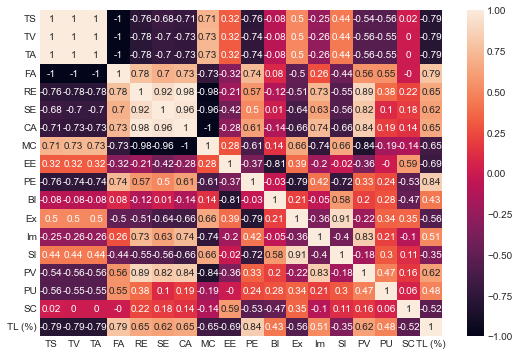

In [8]:
correlation_matrix=evaluation_df.corr().round(2)
plt.figure(figsize=(9,6))
sns.heatmap(data=correlation_matrix, annot=True)

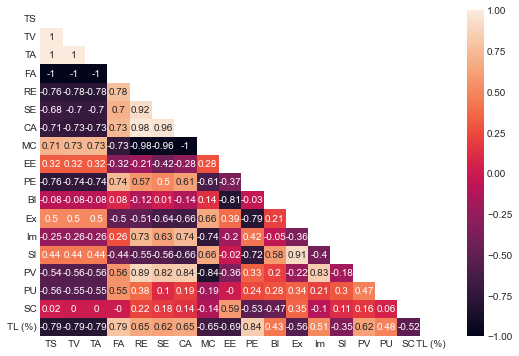

In [9]:
# Steps to remove redundant values
# Return a array filled with zeros
mask = np.zeros_like(correlation_matrix)
# Return the indices for the upper-triangle of array
mask[np.triu_indices_from(mask)] = True
# changing the figure size
plt.figure(figsize = (9, 6))
# "annot = True" to print the values inside the square
fig=sns.heatmap(data=correlation_matrix, annot=True, mask=mask);
plt.savefig('test.png', bbox_inches='tight')


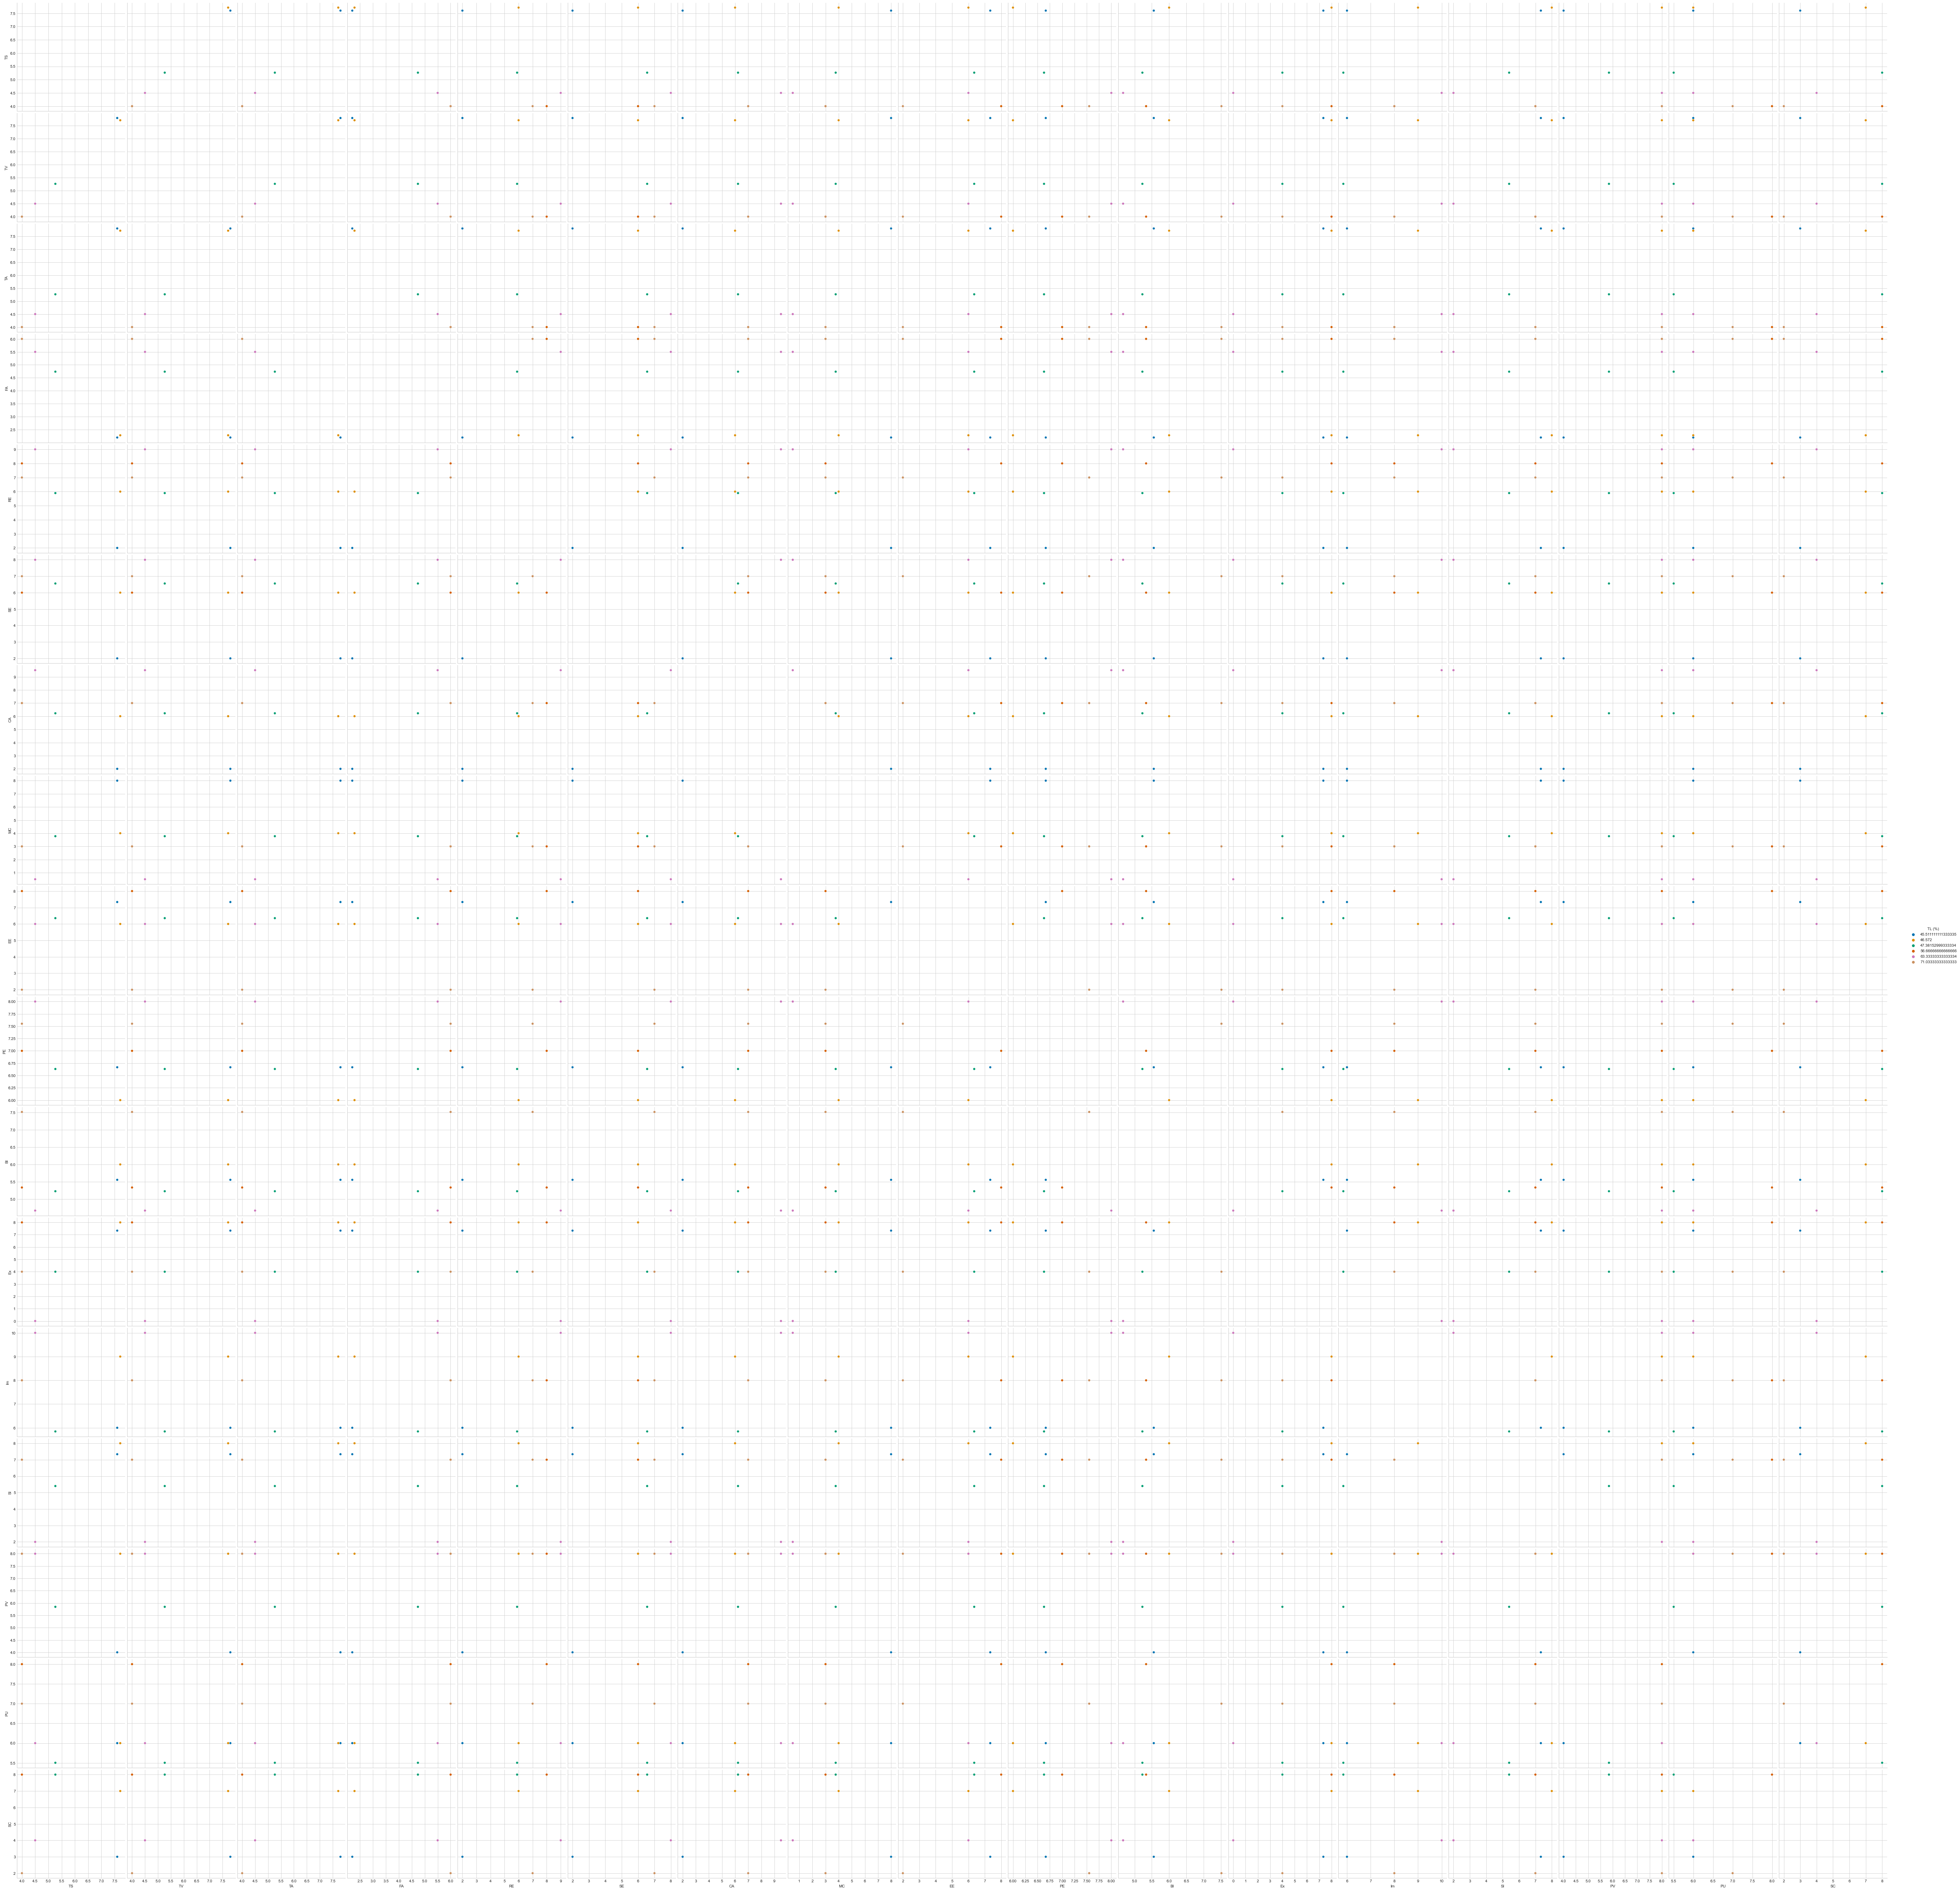

In [10]:
sns.pairplot(evaluation_df, hue="TL (%)",height=4, palette = 'colorblind');

In [11]:
X=evaluation_df[['TS','TV','RE','SE','SC','PE','EE','Ex','Im','SI']]
X

,TS,TV,RE,SE,SC,PE,EE,Ex,Im,SI
0,5.263158,5.263158,5.894737,6.555556,8,6.631579,6.352941,4.000000,5.846154,5.397727
1,4.000000,4.000000,8.000000,6.000000,8,7.000000,8.000000,8.000000,8.000000,7.000000
2,4.000000,4.000000,7.000000,7.000000,2,7.550000,2.000000,4.000000,8.000000,7.000000
3,7.600000,7.800000,2.000000,2.000000,3,6.666667,7.333333,7.333333,6.000000,7.333333
4,7.714000,7.714000,6.000000,6.000000,7,6.000000,6.000000,8.000000,9.000000,8.000000
5,4.500000,4.500000,9.000000,8.000000,4,8.000000,6.000000,0.000000,10.000000,2.000000


In [12]:
y=evaluation_df['TL (%)']
y

0    47.381530
1    56.666667
2    71.033333
3    45.511111
4    46.572000
5    63.333333
Name: TL (%), dtype: float64

In [13]:
#Create Model: Support Vector Machine (SVM)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.001, random_state = 16)
print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (5, 10)
X_test shape:  (1, 10)
y_train shape:  (5,)
y_test shape:  (1,)


In [14]:
 # importing the necessary package to use the classification algorithm
from sklearn import svm #for Support Vector Machine (SVM) Algorithm
model_svm = svm.SVC() #select the algorithm
model_svm.fit(X_train, y_train) #train the model with the training dataset
y_prediction_svm = model_svm.predict(X_test) # pass the testing data to the trained model
# checking the accuracy of the algorithm. 
# by comparing predicted output by the model and the actual output
score_svm = metrics.accuracy_score(y_prediction_svm, y_test).round(4)
print("----------------------------------")
print('The accuracy of the SVM is: {}'.format(score_svm))
print("----------------------------------")
# save the accuracy score
score = set()
score.add(('SVM', score_svm))

ValueError: Unknown label type: 'continuous'

In [ ]:
 # importing the necessary package to use the classification algorithm
from sklearn.tree import DecisionTreeClassifier #for using Decision Tree Algoithm
model_dt = DecisionTreeClassifier(random_state=4)
model_dt.fit(X_train, y_train) #train the model with the training dataset
y_prediction_dt = model_dt.predict(X_test) #pass the testing data to the trained model
# checking the accuracy of the algorithm. 
# by comparing predicted output by the model and the actual output
score_dt = metrics.accuracy_score(y_prediction_dt, y_test).round(4)
print("---------------------------------")
print('The accuracy of the DT is: {}'.format(score_dt))
print("---------------------------------")
# save the accuracy score
score.add(('DT', score_dt))

In [ ]:
# importing the necessary package to use the classification algorithm
from sklearn.neighbors import KNeighborsClassifier # for K nearest neighbours
#from sklearn.linear_model import LogisticRegression # for Logistic Regression algorithm
model_knn = KNeighborsClassifier(n_neighbors=3) # 3 neighbours for putting the new data into a class
model_knn.fit(X_train, y_train) #train the model with the training dataset
y_prediction_knn = model_knn.predict(X_test) #pass the testing data to the trained model
# checking the accuracy of the algorithm. 
# by comparing predicted output by the model and the actual output
score_knn = metrics.accuracy_score(y_prediction_knn, y_test).round(4)
print("----------------------------------")
print('The accuracy of the KNN is: {}'.format(score_knn))
print("----------------------------------")
# save the accuracy score
score.add(('KNN', score_knn))


In [ ]:
 # importing the necessary package to use the classification algorithm
from sklearn.linear_model import LogisticRegression # for Logistic Regression algorithm
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train) #train the model with the training dataset
y_prediction_lr = model_lr.predict(X_test) #pass the testing data to the trained model
# checking the accuracy of the algorithm. 
# by comparing predicted output by the model and the actual output
score_lr = metrics.accuracy_score(y_prediction_lr, y_test).round(4)
print("---------------------------------")
print('The accuracy of the LR is: {}'.format(score_lr))
print("---------------------------------")
# save the accuracy score
score.add(('LR', score_lr))

In [ ]:
# importing the necessary package to use the classification algorithm
from sklearn.naive_bayes import GaussianNB
model_nb = GaussianNB()
model_nb.fit(X_train, y_train) #train the model with the training dataset
y_prediction_nb = model_nb.predict(X_test) #pass the testing data to the trained model
# checking the accuracy of the algorithm. 
# by comparing predicted output by the model and the actual output
score_nb = metrics.accuracy_score(y_prediction_nb, y_test).round(4)
print("---------------------------------")
print('The accuracy of the NB is: {}'.format(score_nb))
print("---------------------------------")
# save the accuracy score
score.add(('NB', score_nb))

In [ ]:
print("The accuracy scores of different Models:")
print("----------------------------------------")
for s in score:
 print(s)
